In [1]:
# Package imports
import numpy as np
from sklearn.model_selection import train_test_split

# Matplotlib is a matlab like plotting library
import matplotlib
from matplotlib import pyplot as plt
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating |datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from scipy.stats import gaussian_kde

In [2]:
# importing dataset
# import data
from DataExtraction import dataNoMass as data
from DataExtraction import dataWithP2
from DataExtraction import dataWithP2E2 
from DataExtraction import dataWithMass 
# from DataExtraction import p2E2 as data
# from DataExtraction import p2NegE2 as data
from DataExtraction import labels
#from DataExtraction import labels2D as labels
data = np.array(data)
labels = np.array(labels)
labels = np.row_stack(labels)
#labels = labels.T
print(labels.shape)

(79102, 1)


In [3]:
# split data 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.5, test_size=0.5, random_state=42)

In [4]:
# normalize data here


In [5]:
# any other data manipulations/printing here
for i in range(5):
    print(train_data[i])
    print(labels[i])
    
print("label shape", labels.shape)
labels.shape[0]

[28.73596191  0.8398658  -0.11143488 39.48083318]
[1]
[47.30611801  1.31948066 -0.59230787 94.81924115]
[1]
[151.81565857   0.9477132   -0.26961038 225.25115398]
[0]
[335.43484497  -0.39157015   0.69631833 361.48074898]
[1]
[32.45707321 -0.29633594  2.52936745 33.89280616]
[1]
label shape (79102, 1)


79102

In [6]:
# define softmax
def softmax(z):
    #Calculate exponent term first
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [7]:
# define loss functions

# softmax loss
def softmax_loss(y,y_hat):
    # clipping value 
    minval = 0.000000000001
    # number of samples
    m = y.shape[0]
    # loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula 
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

# crossentropy loss
def crossEntropy_loss(y, y_hat):
    m = y.shape[0]
    if y.all() == 1:
        return -1/m * np.sum(np.log(y_hat))
    else:
        return -1/m * np.sum(np.log(1 - y_hat))

# mse loss
def mse_loss(y, y_hat):
    m = y.shape[0]
    return np.sum((y_hat - y)**2) / m


In [8]:
# define derivatives

# loss derivative
def loss_derivative(y,y_hat):
    return (y_hat-y)

# tanh derivative
def tanh_derivative(x):
    return (1 - np.power(x, 2))


In [9]:
# forward propogation
def forward_prop(model, a0):
    
    #Start Forward Propagation
    
    # Load parameters from model (1)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + our bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = softmax(z2)
    #print("a2 shape", a2.shape)
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2}
    return cache
    

In [16]:
# This is the BACKWARD PROPAGATION function
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # add weights to print list
    w00.append(W1[0])
    w01.append(W1[1])
    w02.append(W1[2])
    w03.append(W1[3])
    w10.append(W1[0])
    w11.append(W1[1])
    
    # Load forward propagation results
    a0,a1,a2 = cache['a0'],cache['a1'],cache['a2']
    #print("a2 shape in back prop", a2.shape)
    #print("a1 shape in back prop", a1.shape)
    # Get number of samples
    m = y.shape[0]
    #print("m shape", m)
    # Calculate loss derivative with respect to output
    dz2 = loss_derivative(y=y,y_hat=a2)
    #print("y shape", y.shape)
    #print("dz2 shape", dz2.shape)
    # Calculate loss derivative with respect to second layer weights
    dW2 = 1/m*(a1.T).dot(dz2) #dW2 = 1/m*(a1.T).dot(dz2) 
    #print("dW2 shape", dW2.shape)
    # Calculate loss derivative with respect to second layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads


In [92]:
#TRAINING PHASE
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.rand(nn_hdim, nn_output_dim)
    b2 = np.zeros((1,nn_output_dim))
    
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
#     W1 = learning_rate * W1# * grads['dW1']
#     b1 = learning_rate * b1
#     W2 = learning_rate * W2
#     b2 = learning_rate * b2

    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = c['a2']
    # plotArr.append([x, y_hat]) #added to make plot
    return y_hat
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100
def train(model,X_,y_,learning_rate, epochs=2001, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, epochs):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        a2 = cache['a2']
        thisLoss = mse_loss(y_,a2) # set loss function here
        losses.append(thisLoss)
        y_hat = predict(model,X_) # getting rid of this because it's wrong
        y_true = y_.argmax(axis=1)
        accur = accuracy_score(a2,train_labels)
        train_accuracies.append(accur)
        
        if i % 50 == 0:
            placeholderVar = accuracy_score(a2, train_labels)
            test_accuracy = accuracyOfModel(model, test_data, test_labels)
            test_accuracies.append(test_accuracy)
            test_num.append(i)
        #Printing loss & accuracy every 100 iterations
        if print_loss and i % 300==0:
            print('Loss after iteration',i,':',thisLoss)
            print('Train Accuracy after iteration',i,':',accur*100,'%')
            print('Test Accuracy after iteration',i,':',test_accuracy*100,'%')
    return model

In [93]:
# TESTING PHASE
# test the accuracy of any model
def accuracyOfModel(_model, _testData, _testLabels):
    y_pred = predict(_model,_testData) # make predictions on test data
    y_true = _testLabels # get usable info from labels
    return accuracy_score(y_pred, y_true)

def accuracy_score(_outputNodes, _labels):
    for i in range(len(_outputNodes)-1):
        if _outputNodes[i]>.5:
            _outputNodes[i]=[1]
        else:
            _outputNodes[i]=[0]
    numWrong = np.count_nonzero(np.subtract(_outputNodes,_labels))/2
    return (len(_outputNodes)-numWrong)/len(_outputNodes)


In [103]:
# plotArr = []
losses = []
train_accuracies = []
test_accuracies = []
test_num = []
w00 = []
w01 = []
w02 = []
w03 = []
w10 = []
w11 = []
learnRate = 0.07
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=4, nn_hdim= 2, nn_output_dim= 1)
model = train(model,train_data,train_labels,learning_rate=learnRate,epochs=2101,print_loss=True)

Loss after iteration 0 : 0.49996207428383604
Train Accuracy after iteration 0 : 75.0018962858082 %
Test Accuracy after iteration 0 : 74.78319132259614 %
Loss after iteration 300 : 0.49996207428383604
Train Accuracy after iteration 300 : 75.0018962858082 %
Test Accuracy after iteration 300 : 74.78319132259614 %
Loss after iteration 600 : 0.49996207428383604
Train Accuracy after iteration 600 : 75.0018962858082 %
Test Accuracy after iteration 600 : 74.78319132259614 %
Loss after iteration 900 : 0.49996207428383604
Train Accuracy after iteration 900 : 75.0018962858082 %
Test Accuracy after iteration 900 : 74.78319132259614 %
Loss after iteration 1200 : 0.49996207428383604
Train Accuracy after iteration 1200 : 75.0018962858082 %
Test Accuracy after iteration 1200 : 74.78319132259614 %
Loss after iteration 1500 : 0.49996207428383604
Train Accuracy after iteration 1500 : 75.0018962858082 %
Test Accuracy after iteration 1500 : 74.78319132259614 %
Loss after iteration 1800 : 0.4999620742838360

In [104]:
print("weight 1", model['W1'])
print("bias 1", model['b1'])
print("weight 2", model['W2'])
print("bias 2", model['b2'])

weight 1 [[ 2.52810469 -0.19968558]
 [ 0.95747597  3.4817864 ]
 [ 2.73511598 -2.95455576]
 [ 0.90017684 -1.30271442]]
bias 1 [[ 0.00000000e+00 -1.96903547e-13]]
weight 2 [[-71.60209674]
 [ 74.2963053 ]]
bias 2 [[-73.52942226]]


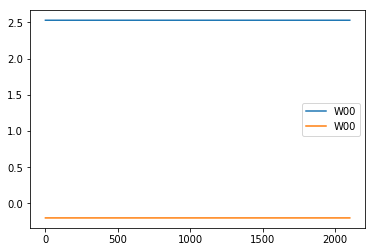

In [105]:
plt.plot(w00, label="W00")
plt.legend()

Text(0, 0.5, 'Score')

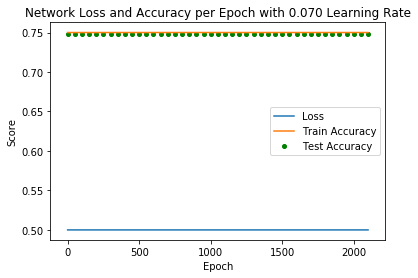

In [106]:
plt.plot(losses, label="Loss")
plt.plot(train_accuracies, label="Train Accuracy")
plt.scatter(test_num, test_accuracies, label="Test Accuracy", s=16, color="green")
#plt.plot(test_accuracies, label="Test Accuracy")
plt.plot()
plt.legend()
plt.title("Network Loss and Accuracy per Epoch with %1.3f Learning Rate" %learnRate)
plt.xlabel("Epoch")
plt.ylabel("Score")

In [107]:
cache = forward_prop(model, test_data)
testgrads = backward_prop(model,cache,train_labels)

In [108]:
print("cache a0", cache['a0'])
print("cache a1", cache['a1'])
print("cache z1", cache['z1'])
print("cache a2", cache['a2'])
print("cache z2", cache['z2'])

cache a0 [[ 3.04954052e+01  1.73306084e+00 -1.82328641e+00  8.89655894e+01]
 [ 2.89854202e+01 -7.85819769e-01 -3.02078390e+00  3.84051155e+01]
 [ 1.25733505e+02 -1.58720958e+00 -1.75277555e+00  3.20279714e+02]
 ...
 [ 2.29264641e+01 -7.84133911e-01  4.91462834e-02  3.03434493e+01]
 [ 4.72479477e+01  4.24064606e-01 -1.08015470e-01  5.15604216e+01]
 [ 3.28610115e+01  6.34800732e-01  1.06677556e+00  3.97075345e+01]]
cache a1 [[ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 ...
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]]
cache z1 [[ 153.85280391 -110.56509958]
 [  98.83497431  -49.62985025]
 [ 599.86208452 -442.68782094]
 ...
 [  84.65860299  -46.98232545]
 [ 165.97185225  -74.80759849]
 [ 122.34544144  -59.23105523]]
cache a2 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
cache z2 [[-219.42782431]
 [-219.42782431]
 [-219.42782431]
 ...
 [-219.42782431]
 [-219.42782431]
 [-219.42782431]]


In [109]:
print("test grads dW2", testgrads['dW2'])
print("test grads db2", testgrads['db2'])
print("test grads dW1", testgrads['dW1'])
print("test grads db1", testgrads['db1'])

test grads dW2 [[ 0.49996207]
 [-0.49996207]]
test grads db2 [0.49996207]
test grads dW1 [[ 0.00000000e+00  2.21905169e-13]
 [ 0.00000000e+00  2.17623866e-15]
 [ 0.00000000e+00 -4.31867194e-14]
 [ 0.00000000e+00  2.26490913e-13]]
test grads db1 [0.00000000e+00 1.41896446e-14]
